## Predictive Maintenance Example: Machine Learning Modeling
#### Supplement to 'Operationalizing Predictive Maintenance on a Distributed Network of Equipment'
###### Melissa Perry
###### UWEX Data Science Masters Program Capstone
###### December 12, 2021

In [5]:
# EXECUTE FIRST

# computational imports
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint
from GPyOpt.methods import BayesianOptimization
from tpot import TPOTRegressor
from pprint import pprint

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# for reading files from urls
import urllib.request
# display imports
from IPython.display import display, IFrame
from IPython.core.display import HTML

# # import notebook styling for tables and width etc.
# response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
# HTML(response.read().decode("utf-8"));

# import warnings
import warnings

In [26]:
# import data
X_train = pd.read_csv('x_train.csv').iloc[: , 1:]
y_train = pd.read_csv('y_train.csv')['RUL']
X_test = pd.read_csv('x_test.csv').iloc[: , 1:]
y_test = pd.read_csv('y_test.csv')['RUL']

### Baseline models

In [27]:
# Step 1: import the model
# from sklearn.linear_model import LinearRegression

# Step 2: create a model object (hyperparameters are declared here, we are using default values) 
model_lr = LinearRegression()

# Step 3: fit the model by calling its fit() method
model_lr.fit(X_train, y_train)

LinearRegression()

In [28]:
score_training = model_lr.score(X_train,y_train)
print(f"Model r-squared score from training data {score_training:.4f}")

Model r-squared score from training data 0.6756


In [29]:
# Step 4 - assess model quality on test data
score_test = model_lr.score(X_test,y_test)
print(f"Model r-squared score from test data: {score_test:.4f}")

Model r-squared score from test data: 0.2630


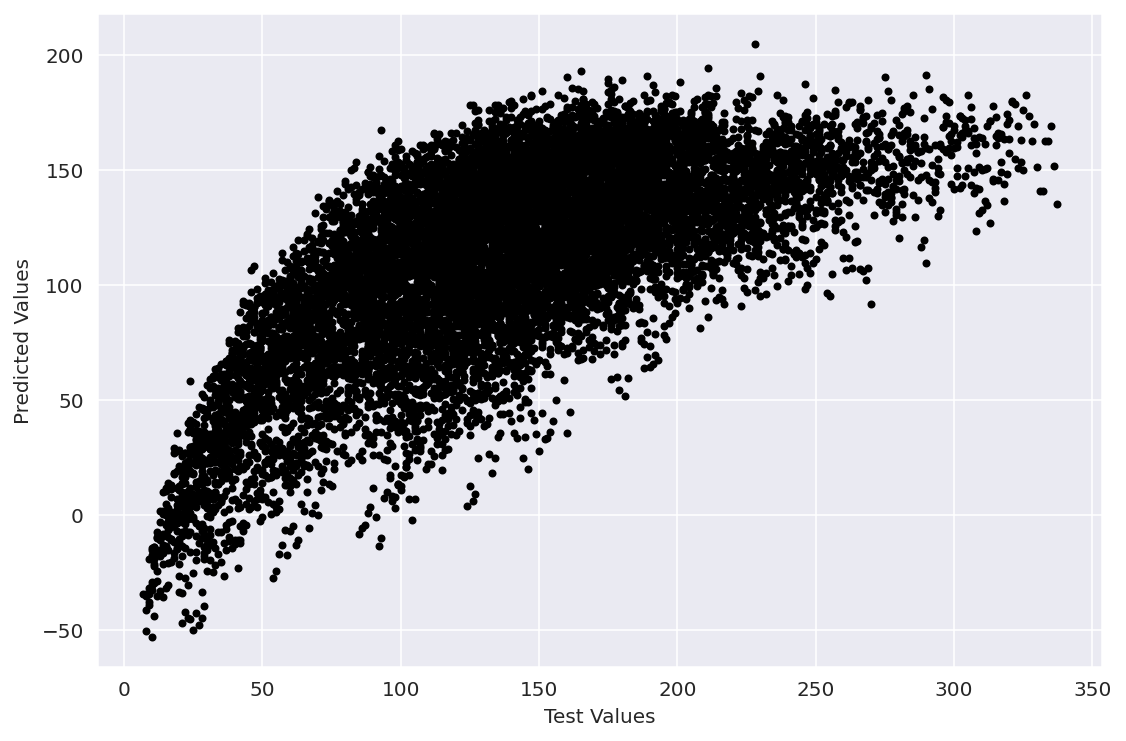

In [31]:
# Step 5 - make predictions
y_pred = model_lr.predict(X_test)

# The plot is optional, but it gives an idea of the model accuracy, 
# in a perfect model the points would line up along the diagonal (y=x)
# import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(y_test,y_pred,'k.')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values');

In [32]:
# Step 6: Assess accuracy on test-data.

# from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"Mean squared error on test data: {mse:.2f}")
print(f"Root mean squared error on test data: {rmse:.2f}")

Mean squared error on test data: 2519.87
Root mean squared error on test data: 50.20


Model r-squared score from test data: 0.2630
Mean squared error on test data: 2519.87
Root mean squared error on test data: 50.20


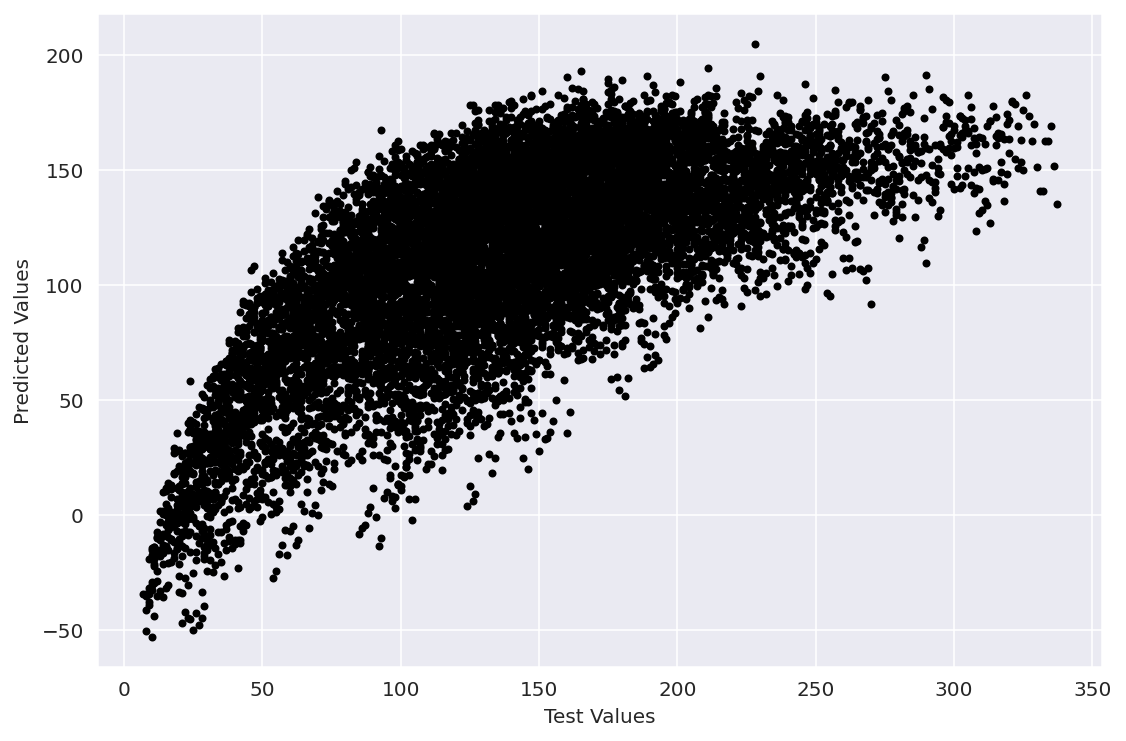

In [33]:
# Here is all the code in one cell with most of it wrapped into a function for reuse

# from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train) # this could be inside the function below too

def my_regression_results(model):
    score_test = model.score(X_test,y_test)
    print('Model r-squared score from test data: {:0.4f}'.format(score_test))

    y_pred = model.predict(X_test)
    # import matplotlib.pyplot as plt
    plt.figure(figsize=(9,6))
    plt.plot(y_test,y_pred,'k.')
    plt.xlabel('Test Values')
    plt.ylabel('Predicted Values');

    # from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print('Mean squared error on test data: {:0.2f}'.format(mse))
    print('Root mean squared error on test data: {:0.2f}'.format(rmse))
    
my_regression_results(model_lr)

Model r-squared score from test data: -0.0484


Mean squared error on test data: 3584.38
Root mean squared error on test data: 59.87


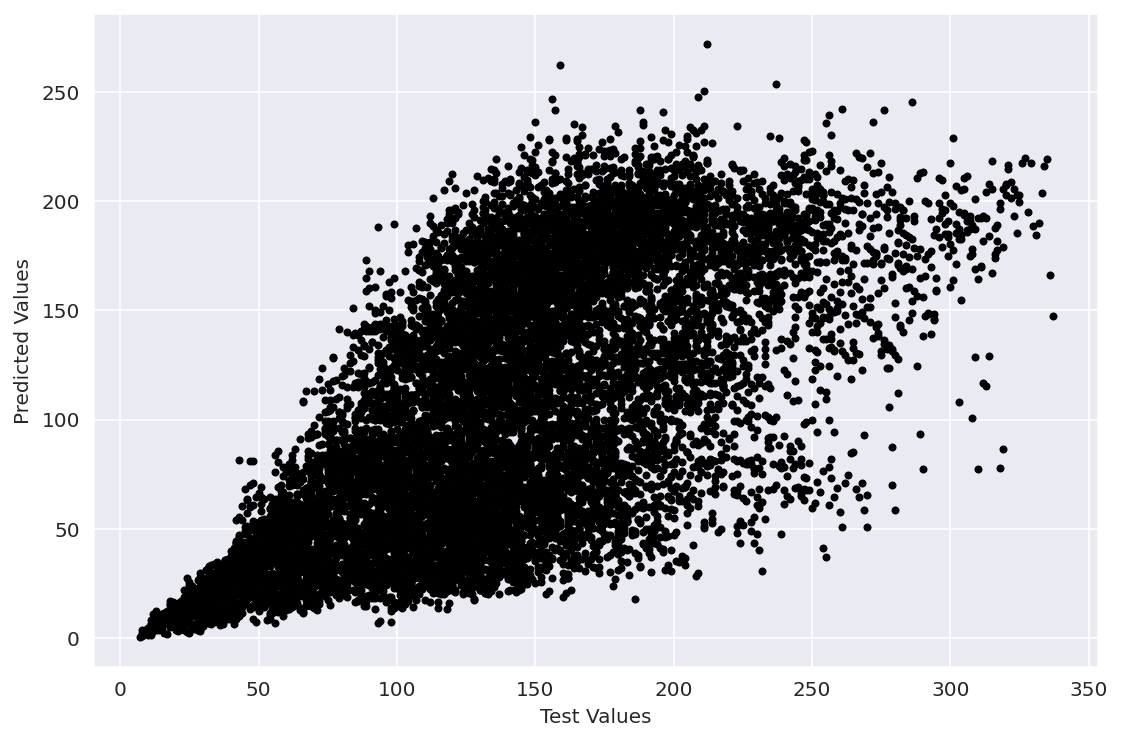

In [34]:
# from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train,y_train)

my_regression_results(rf_model)

Model r-squared score from test data: -0.0623
Mean squared error on test data: 3631.99
Root mean squared error on test data: 60.27


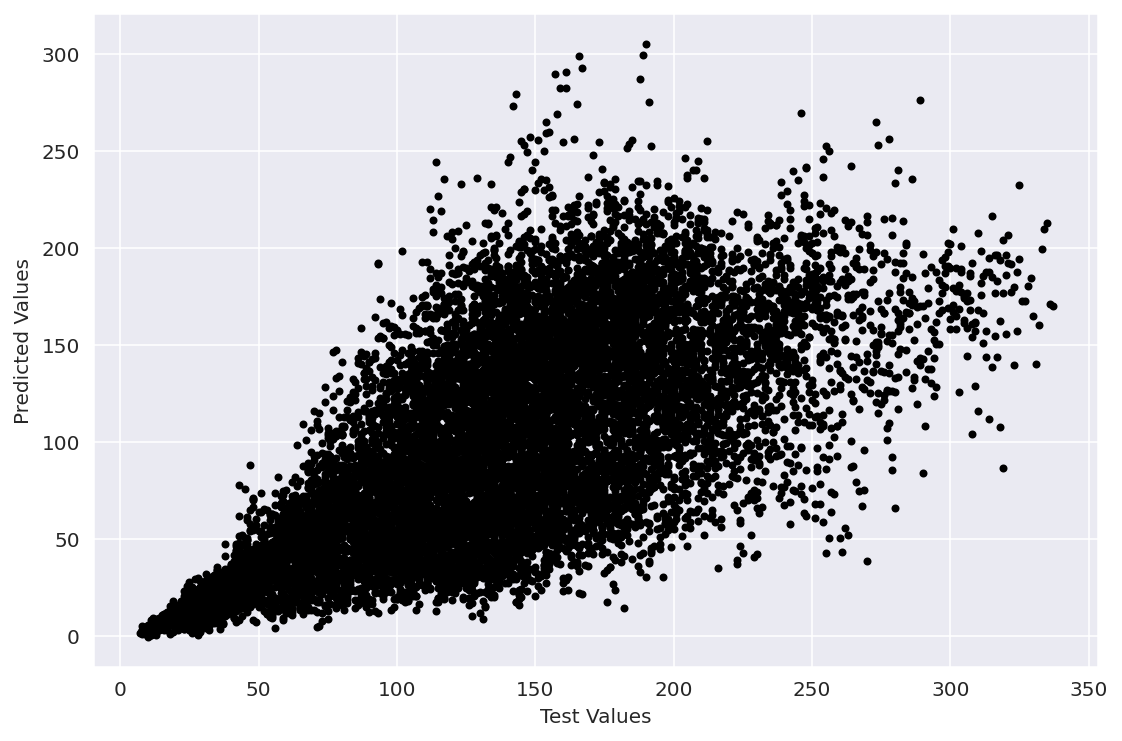

In [35]:
# import xgboost as xgb

xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror')
xgbr_model.fit(X_train,y_train)

my_regression_results(xgbr_model)